# I. Numpy

### Импортируйте NumPy

In [15]:
import numpy as np

### Создайте одномерный массив размера 10, заполненный нулями и пятым элемент равным 1. Трансформируйте в двумерный массив.

In [16]:
a = np.zeros(10)
a[4] = 1
a_new = a.reshape(2, 5)

### Создайте одномерный массив со значениями от 10 до 49 и разверните его (первый элемент становится последним). Найдите в нем все четные элементы.

In [17]:
a = np.arange(10, 49)
a_rev = np.flip(a)
chet = a_rev[a_rev % 2 == 0]

### Создайте двумерный массив 3x3 со значениями от 0 до 8

In [18]:
a = np.arange(9).reshape(3, 3)

### Создайте массив 4x3x2 со случайными значениями. Найти его минимум и максимум.

In [19]:
a = np.random.randint(0, 100, size=(4, 3, 2))
min_a = np.min(a)
max_a = np.max(a)

### Создайте два двумерных массива размерами 6x4 и 4x3 и произведите их матричное умножение. 

In [20]:
a = np.random.randint(0, 100, size=(6, 4))
b = np.random.randint(0, 100, size=(4, 3))

c = np.dot(a, b)

### Создайте случайный двумерный массив 7x7, найти у него среднее и стандартное оклонение. Нормализуйте этот массив.

In [21]:
a = np.random.randint (0, 100, size=(7, 7))

mean_dev = np.mean(a)
standart_dev = np.std(a)

norm_a = (a - mean_dev) / standart_dev

# II. Pandas

### Импортируйте: pandas, matplotlib, seaborn

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузите датасет Tips из набора датасетов seaborn

In [24]:
data_tips = sns.load_dataset('tips')

<class 'NameError'>: name 'sns' is not defined

In [31]:
df = pd.read_csv('tips.csv')

### Посмотрите на первые 5 строчек

In [32]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Узнайте сколько всего строчек и колонок в данных

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 9.6+ KB


### Проверьте есть ли пропуски в данных

In [35]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### Посмотрите на распределение числовых признаков

In [67]:
num = df[['total_bill', 'tip', 'size']]
num_sum = num.describe()
num_sum

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Найдите максимальное значение 'total_bill'

In [39]:
total_bill_max = df['total_bill'].max()
total_bill_max

50.81

### Найдите количество курящих людей

In [44]:
smokers = (df['smoker'] == 'Yes').sum()
smokers

93

### Узнайте какой средний 'total_bill' в зависимости от 'day'

In [48]:
bill_by_day = df.groupby('day')['total_bill'].mean()
bill_by_day

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

### Отберите строчки с 'total_bill' больше медианы и узнайте какой средний 'tip' в зависимости от 'sex'

In [55]:
m_t_b = df['total_bill'].mean()
filt = df[df['total_bill'] > m_t_b]
tip_by_sex = filt.groupby('sex')['tip'].mean().reset_index()
tip_by_sex

,sex,tip
0,Female,3.814286
1,Male,3.968028


### Преобразуйте признак 'smoker' в бинарный (0-No, 1-Yes)

In [56]:
smok_map = {'No': 0, 'Yes': 1}
df['smoker'] = df['smoker'].map(smok_map)

# III. Visualization

### Постройте гистограмму распределения признака 'total_bill'

Text(0, 0.5, 'Frequency')

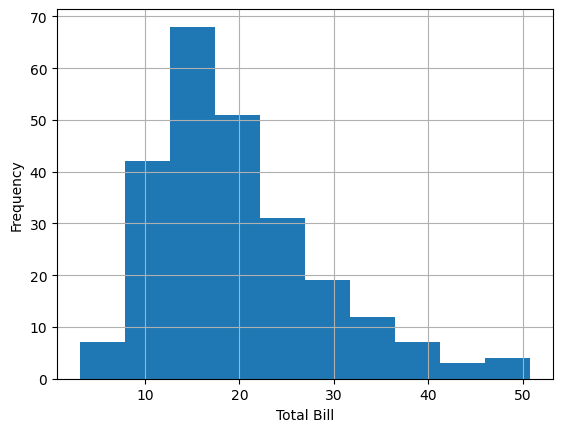

In [95]:
df['total_bill'].hist()
plt.xlabel('Total Bill')
plt.ylabel('Frequency')

### Постройте scatterplot, представляющий взаимосвязь между признаками 'total_bill' и 'tip'

Text(0, 0.5, 'Tip')

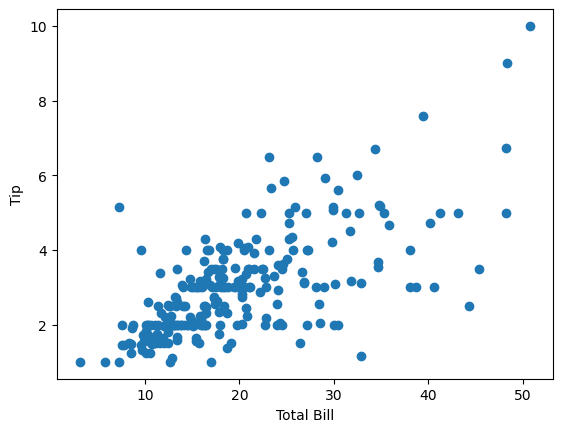

In [96]:
plt.scatter(df['total_bill'], df['tip'])
plt.xlabel('Total Bill')
plt.ylabel('Tip')

### Постройте pairplot

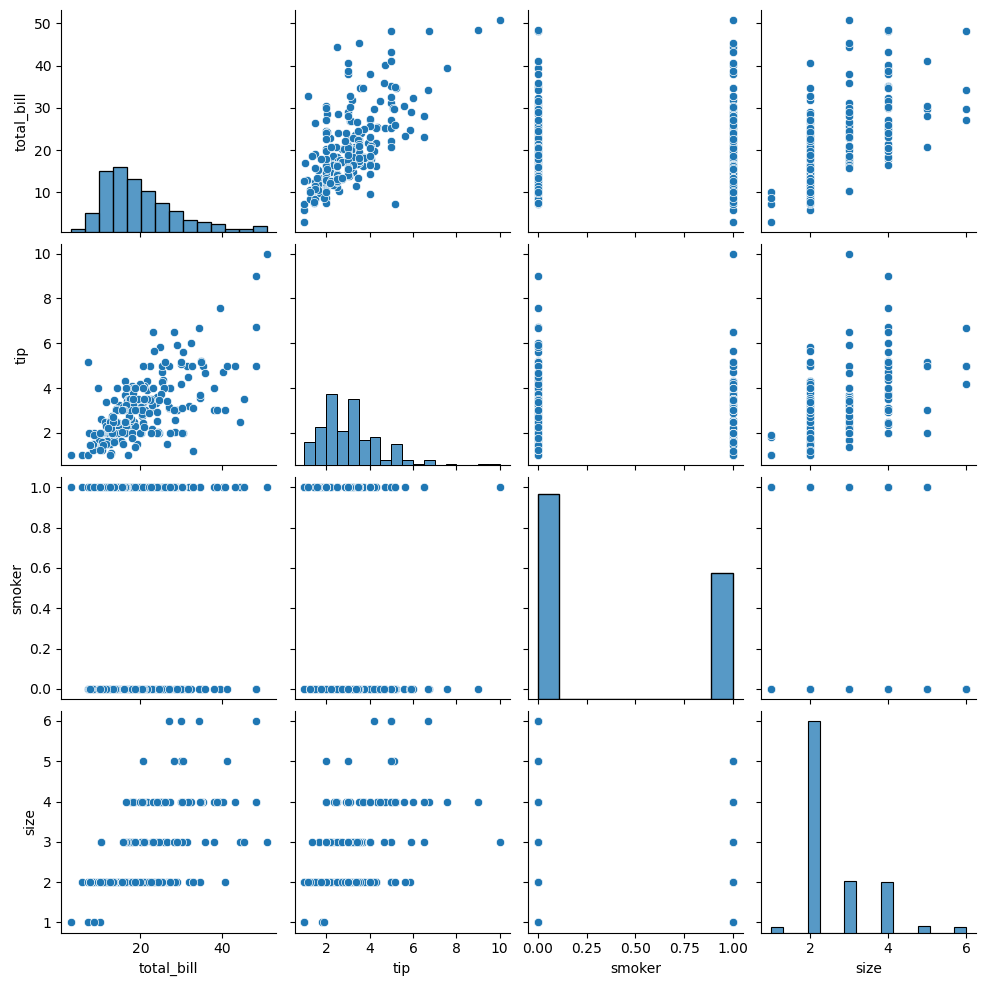

In [64]:
sns.pairplot(df)

### Постройте график взаимосвязи между признаками 'total_bill' и 'day'

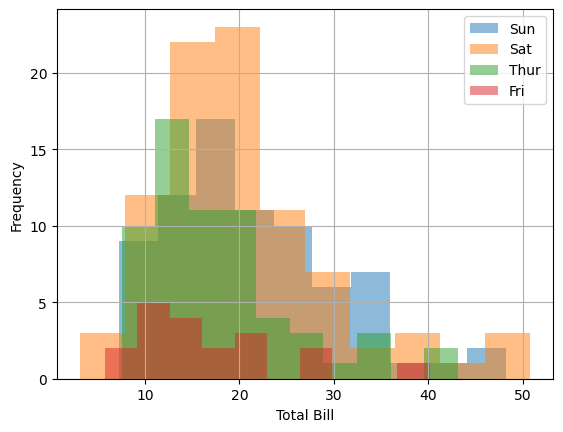

In [101]:
for day in df['day'].unique():
    df[df['day'] == day]['total_bill'].hist(bins=10, alpha=0.5, label=day)
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.legend()

### Постройте две гистограммы распределения признака 'tip' в зависимости от категорий 'time'

Text(0, 0.5, 'Frequency')

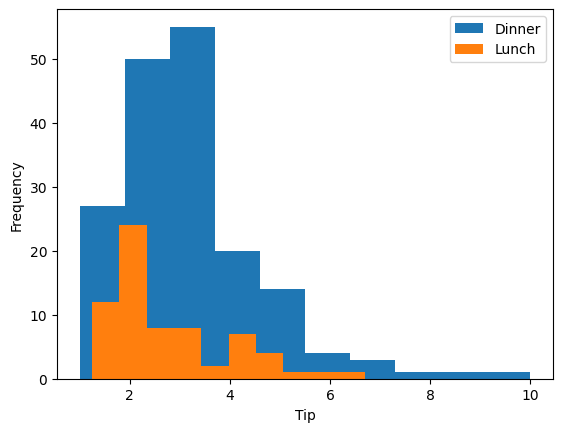

In [97]:
for time in df['time'].unique():
    plt.hist(df[df['time'] == time]['tip'], bins=10, label=time)
plt.legend()
plt.xlabel('Tip')
plt.ylabel('Frequency')

### Постройте два графика scatterplot, представляющих взаимосвязь между признаками 'total_bill' и 'tip' один для Male, другой для Female и раскрасьте точки в зависимоти от признака 'smoker'

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

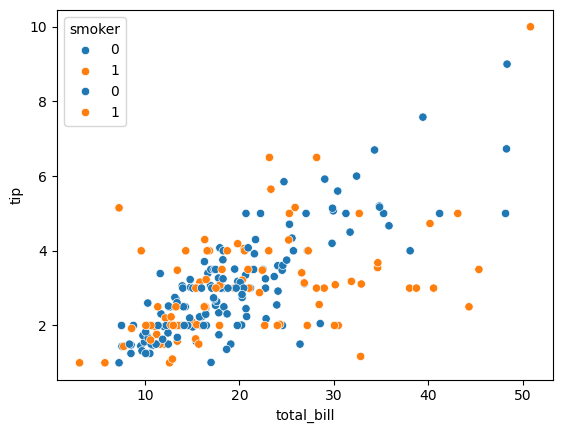

In [91]:
sns.scatterplot(x='total_bill', y='tip', hue='smoker', data=df[df['sex'] == 'Male'])
sns.scatterplot(x='total_bill', y='tip', hue='smoker', data=df[df['sex'] == 'Female'])

## Сделайте выводы по анализу датасета и построенным графикам. По желанию можете продолжить анализ данных и также отразить это в выводах.

Посетители с общим чеком до 20 в среднем платят 20% чаевых, но ближе к 30 размер чаевых "прижимается" к 5, если отбросить выбросы.
Но количетсва значений не достаточно, чтобы сделать конкретный вовод, где размер чека больше 30.
Частота чаевых и их размер значительно выше на ужине, чем в обед.
Частота чаевых и их размер значительно выше в субботу, чем в другие дни.
Средний размер чаевых не зависит от пола
Курильщики получают в реднем ниже чаевые чем не курящие официанты, если чек выше 25.